<a href="https://colab.research.google.com/github/Gabriellemga/Praticando_Python/blob/main/Praticando_gr%C3%A1ficos_gr%C3%A1ficos_de_compara%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Curso de Praticando gráficos: criando gráficos de comparação

## 01-Comparando valores médios de automóveis usados

Sua tarefa será:

* Carregar os [dados](https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dados_automoveis.csv);

* Agrupar os valores médios dos automóveis pela coluna que contém o tamanho dos automóveis;

* Ordenar o resultado do agrupamento do maior para o menor valor médio;

* Escolher o tipo de gráfico mais adequado para visualizar as informações;

* Personalizar o gráfico para deixá-lo mais informativo e visualmente compreensível.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dados_automoveis.csv'

In [ ]:
df_automoveis = pd.read_csv(url)
df_automoveis.head()

,Marca,Modelo,Ano,Tipo_combustivel,Potencia_motor,Cilindros_motor,Tipo_transmissao,Rodas_motrizes,Numero_portas,Tamanho,Estilo,Consumo_estrada_milhas,Consumo_cidade_milhas,Valor($)
0,GMC,Envoy XL,2005,gasolina comum,275.0,6.0,automatico,tracao traseira,4.0,grande,SUV 4 portas,18,13,29695
1,Volkswagen,Passat,2016,gasolina comum,170.0,4.0,automatico,tracao dianteira,4.0,medio,seda,38,25,30495
2,Honda,Odyssey,2016,gasolina comum,248.0,6.0,automatico,tracao dianteira,4.0,grande,minivan de passageiros,28,19,37650
3,Chevrolet,Cruze,2015,gasolina comum,138.0,4.0,manual,tracao dianteira,4.0,medio,seda,36,25,16170
4,Volvo,740,1991,gasolina comum,162.0,4.0,automatico,tracao traseira,4.0,medio,seda,20,17,2000


In [ ]:
valor_tamanho = df_automoveis.groupby('Tamanho')['Valor($)'].mean().reset_index().sort_values('Valor($)', ascending = False)
valor_tamanho

,Tamanho,Valor($)
1,grande,35329.699410
2,medio,31600.765373
0,compacto,22320.428052


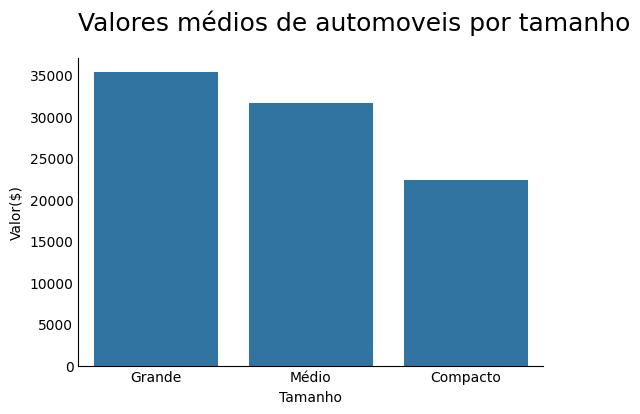

In [ ]:
fig, ax = plt.subplots(figsize = (6,4))

ax = sns.barplot(data = valor_tamanho, x = 'Tamanho', y = 'Valor($)')
ax.set_title('Valores médios de automoveis por tamanho',loc = 'left', fontsize = 18, pad = 20)
ax.tick_params(axis="both", which="both", length=0)
ax.set_xticklabels(['Grande', 'Médio', 'Compacto'])
sns.despine()

plt.show()

## 02-Comparando valores médios de automóveis por estilo

Sua tarefa será:

* Agrupar os valores médios dos automóveis pela coluna que contém o estilo dos automóveis;

* Ordenar o resultado do agrupamento do maior para o menor valor médio;

* Escolher o tipo de gráfico mais adequado para visualizar as informações, levando em conta a quantidade de categorias;

* Personalizar o gráfico para deixá-lo mais informativo e visualmente compreensível.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dados_automoveis.csv'
df_automoveis = pd.read_csv(url)
df_automoveis.head()

,Marca,Modelo,Ano,Tipo_combustivel,Potencia_motor,Cilindros_motor,Tipo_transmissao,Rodas_motrizes,Numero_portas,Tamanho,Estilo,Consumo_estrada_milhas,Consumo_cidade_milhas,Valor($)
0,GMC,Envoy XL,2005,gasolina comum,275.0,6.0,automatico,tracao traseira,4.0,grande,SUV 4 portas,18,13,29695
1,Volkswagen,Passat,2016,gasolina comum,170.0,4.0,automatico,tracao dianteira,4.0,medio,seda,38,25,30495
2,Honda,Odyssey,2016,gasolina comum,248.0,6.0,automatico,tracao dianteira,4.0,grande,minivan de passageiros,28,19,37650
3,Chevrolet,Cruze,2015,gasolina comum,138.0,4.0,manual,tracao dianteira,4.0,medio,seda,36,25,16170
4,Volvo,740,1991,gasolina comum,162.0,4.0,automatico,tracao traseira,4.0,medio,seda,20,17,2000


In [ ]:
esstilo_valor = df_automoveis.groupby('Estilo')['Valor($)'].mean().reset_index().sort_values('Valor($)', ascending = False)
esstilo_valor.head()

,Estilo,Valor($)
10,picape cabine dupla,37220.466960
1,SUV 4 portas,36274.644799
3,conversivel,35247.457658
15,van de passageiros,29015.203125
13,seda,28844.134643


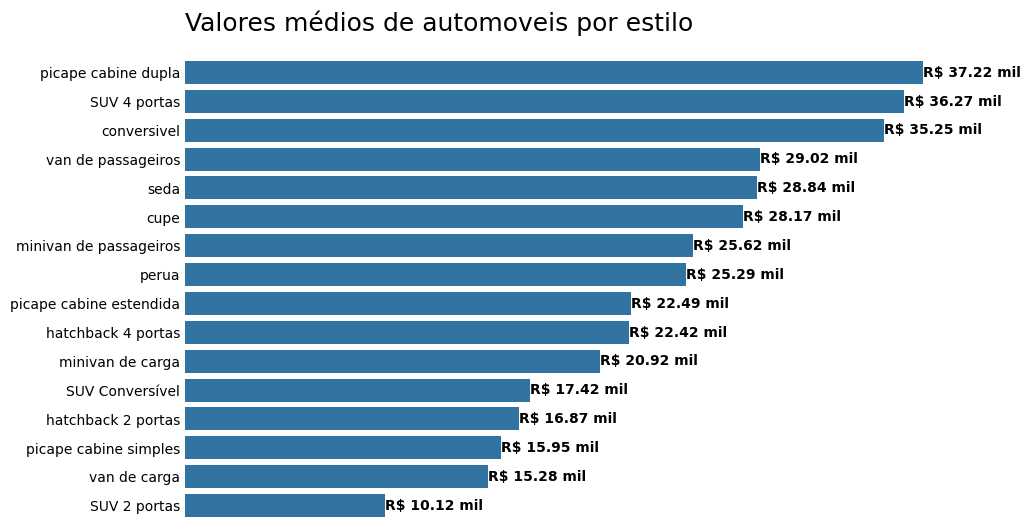

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))

ax = sns.barplot(data = esstilo_valor, x = 'Valor($)', y = 'Estilo')
ax.set_title('Valores médios de automoveis por estilo',loc = 'left', fontsize = 18, pad = 20)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_xticklabels([])
ax.tick_params(axis='both', which='both', length=0)
ax.set_frame_on(False)

for container in ax.containers:
    labels = [f'R$ {valor.get_width()/1000:,.2f} mil '.replace(',','.') for valor in container]
    ax.bar_label(container, label_type='edge', labels = labels, size = 10, fontweight = 'bold')



plt.show()

## 03-Analisando os níveis de poluentes atmosféricos ao longo do tempo

A qualidade do ar é um fator essencial para a saúde pública e o meio ambiente. Um dos principais poluentes atmosféricos é o ozônio (O₃), cuja concentração pode variar ao longo do tempo devido a fatores como temperatura e atividades humanas.

Nesta atividade, você irá explorar a variação diária dos níveis de ozônio em uma cidade localizada no continente asiático. O objetivo é criar um gráfico que represente essa evolução ao longo do tempo, possibilitando a identificação de padrões sazonais e tendências, como aumentos ou reduções na concentração desse poluente.


Sua tarefa será:

* Carregar os [dados](https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/poluentes.csv);

* Formatar a coluna de datas corretamente para facilitar a análise temporal;

* Escolher o tipo de gráfico mais adequado para representar a evolução dos níveis de ozônio ao longo dos anos;

* Personalizar o gráfico para deixá-lo mais informativo e visualmente compreensível.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = ('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/poluentes.csv')
df_ar = pd.read_csv(url)
df_ar.head()

,Data,PM2.5,PM10,SO2,NO2,CO,O3,TEMP
0,2020-03-01,7.0,11.0,12.0,23.0,429.0,64.0,1.0
1,2020-03-02,31.0,42.0,37.0,67.0,825.0,30.0,1.0
2,2020-03-03,77.0,121.0,61.0,81.0,1621.0,19.0,6.0
3,2020-03-04,23.0,45.0,23.0,46.0,606.0,54.0,10.0
4,2020-03-05,149.0,184.0,94.0,133.0,2358.0,68.0,6.0


In [ ]:
df_ar['Data'] = pd.to_datetime(df_ar['Data'])
df_ar = df_ar.groupby('Data')['O3'].sum().reset_index()


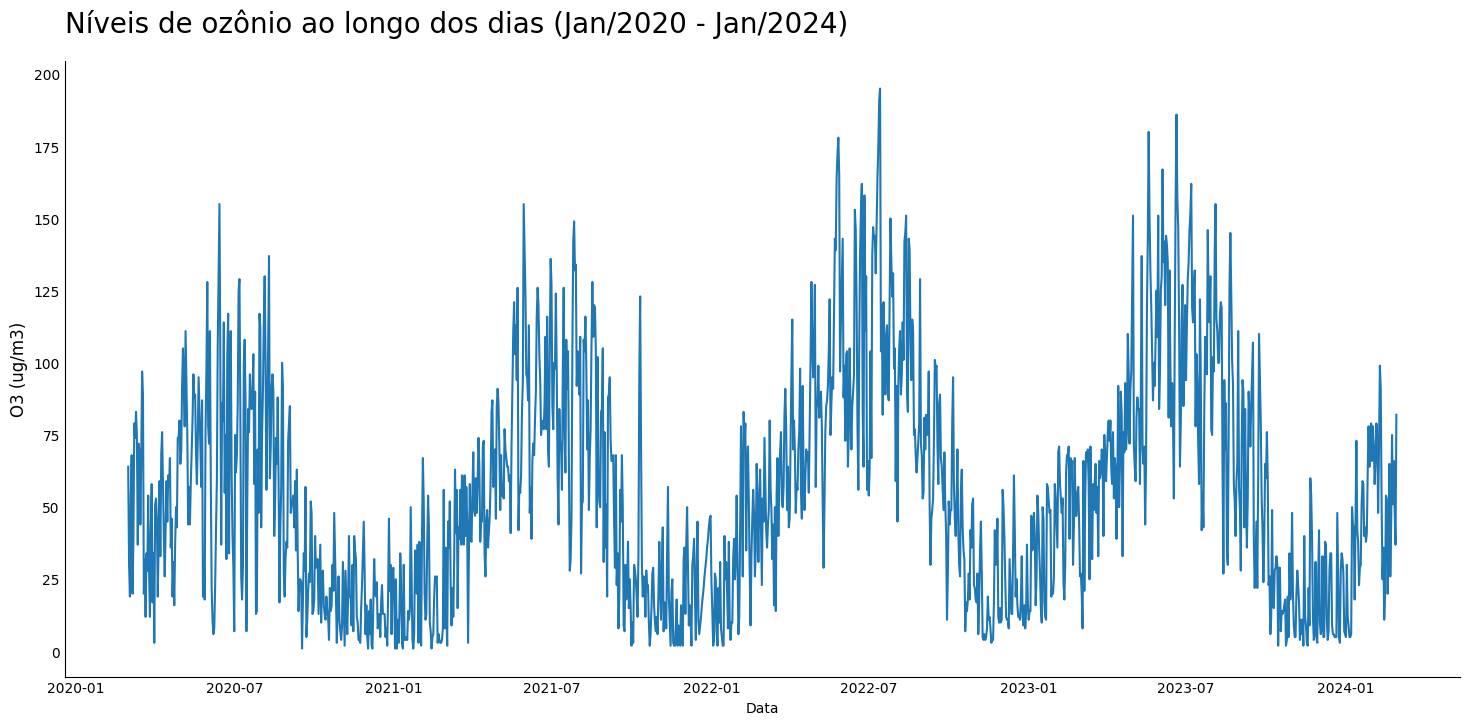

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))

ax = sns.lineplot(x='Data', y='O3', data=df_ar)
ax.set_title('Níveis de ozônio ao longo dos dias (Jan/2020 - Jan/2024)', loc='left', fontsize = 20, pad = 20)
ax.set_ylabel('O3 (ug/m3)', fontsize=12)
ax.tick_params(axis='both', which='both', length=0)
sns.despine()

## 04-Analisando a variação da temperatura ao longo do tempo

Na atividade anterior, analisamos a variação dos níveis de ozônio (O₃) ao longo do tempo e identificamos como eles flutuam em diferentes períodos do ano. Agora, vamos investigar um fator que pode influenciar diretamente essas variações: a temperatura.

Nesta atividade, você irá analisar a variação das temperaturas ao longo dos dias, criando um gráfico que ilustra essa evolução. Ao final, você poderá comparar este gráfico com o anterior e refletir sobre possíveis correlações entre os dois fenômenos.

Sua tarefa será:

* Criar um gráfico adequado para visualizar a evolução das temperaturas ao longo do tempo;

* Comparar visualmente este gráfico com o da atividade anterior e refletir sobre possíveis relações entre temperatura e ozônio;

* Personalizar o gráfico para deixá-lo mais informativo e visualmente compreensível.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = ('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/poluentes.csv')
df_ar = pd.read_csv(url)
df_ar.head()

,Data,PM2.5,PM10,SO2,NO2,CO,O3,TEMP
0,2020-03-01,7.0,11.0,12.0,23.0,429.0,64.0,1.0
1,2020-03-02,31.0,42.0,37.0,67.0,825.0,30.0,1.0
2,2020-03-03,77.0,121.0,61.0,81.0,1621.0,19.0,6.0
3,2020-03-04,23.0,45.0,23.0,46.0,606.0,54.0,10.0
4,2020-03-05,149.0,184.0,94.0,133.0,2358.0,68.0,6.0


In [ ]:
df_ar['Data'] = pd.to_datetime(df_ar['Data'])
df_ar = df_ar.groupby('Data')['TEMP'].sum().reset_index()

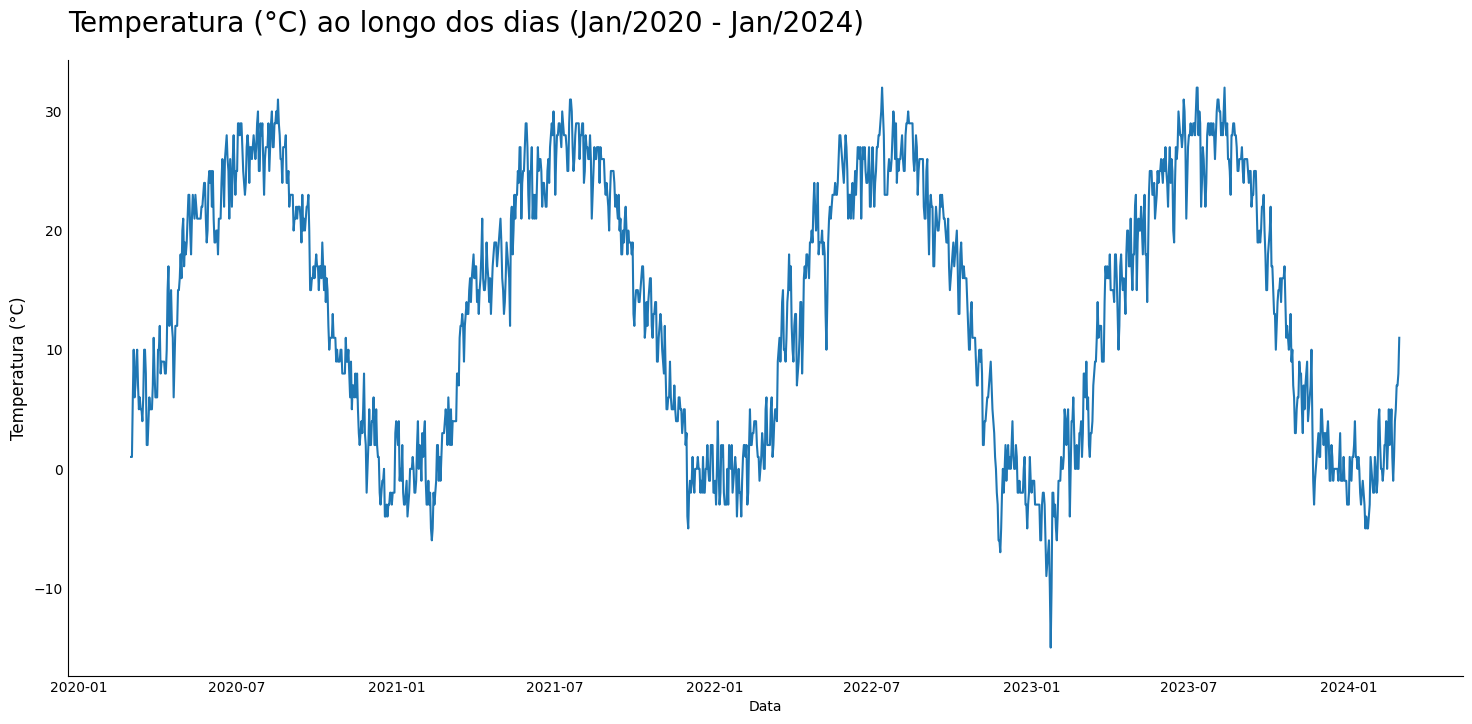

In [ ]:
fig, ax = plt.subplots(figsize = (18,8))

ax = sns.lineplot(x='Data', y='TEMP', data=df_ar)
ax.set_title('Temperatura (°C) ao longo dos dias (Jan/2020 - Jan/2024)', loc='left', fontsize = 20, pad = 20)
ax.set_ylabel('Temperatura (°C)', fontsize=12)
ax.tick_params(axis='both', which='both', length=0)
sns.despine()

## 05-Comparando o preço médio do aluguel por região em São Paulo

O mercado imobiliário de São Paulo é dinâmico e os preços dos alugueis podem variar de acordo com a região da cidade. Entender essas variações é fundamental para quem deseja alugar um imóvel ou investir no setor imobiliário.

Nesta atividade, você irá analisar o preço médio dos alugueis de alguns apartamentos em São Paulo por região, criando um gráfico que compara essas médias de forma visual e intuitiva.

Sua tarefa será:

* Carregar os [dados](https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/apartamentos_aluguel.csv);

* Agrupar os valores por região e calcular a média do aluguel;

* Ordenar os valores do maior para o menor;

* Criar um gráfico adequado para comparar os preços entre as regiões;

* Personalizar o gráfico e usar cores diferentes para cada região.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/apartamentos_aluguel.csv'

In [9]:
df = pd.read_csv(url)
df.head()

,Quartos,Banheiros,Suites,Vagas,Elevador,Mobiliado,Piscina,Regiao,Ano,Valor
0,2,2,1,1,Nao,Nao,Sim,Centro,2015,2500
1,1,2,1,2,Sim,Sim,Sim,Centro,2019,5000
2,1,2,1,1,Sim,Sim,Nao,Centro,2007,1600
3,2,2,1,1,Nao,Nao,Nao,Centro,2008,1500
4,3,3,1,1,Sim,Nao,Nao,Centro,2009,2200


In [11]:
aluguel_regiao = df.groupby('Regiao')['Valor'].mean().reset_index().sort_values('Valor', ascending = False)
aluguel_regiao

,Regiao,Valor
3,Oeste,3590.162451
0,Centro,3001.555556
4,Sul,2976.616363
2,Norte,1994.897152
1,Leste,1697.117310


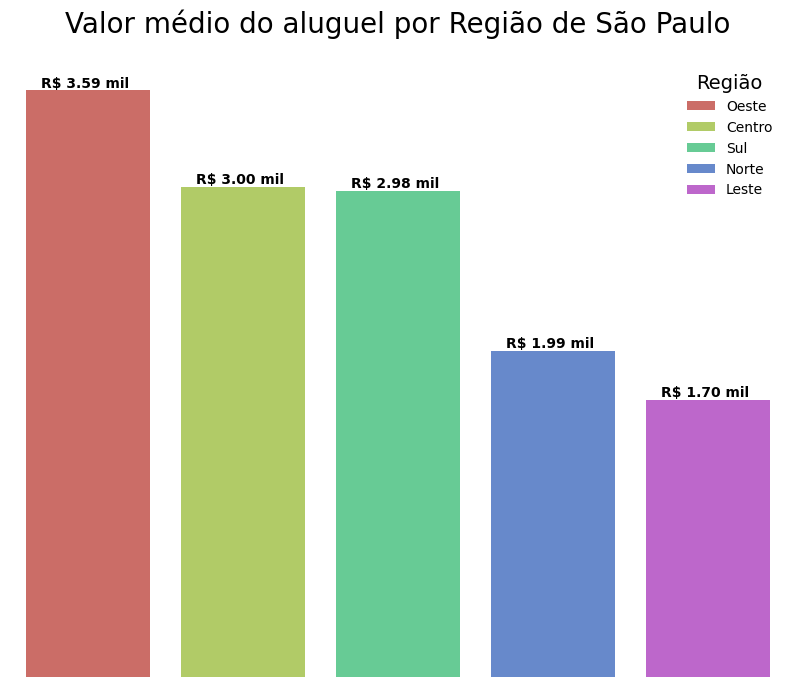

In [35]:
fig, ax = plt.subplots(figsize = (10,8))

ax = sns.barplot(data = aluguel_regiao, x = 'Regiao', y = 'Valor', palette = 'hls', hue = 'Regiao', legend = True)
ax.set_title('Valor médio do aluguel por Região de São Paulo', fontsize = 20, pad = 20)
ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_yticklabels([])
ax.set_ylabel('')
ax.tick_params(axis='both', which='both', length=0)
ax.set_frame_on(False)
ax.legend(frameon = False, title = 'Região', title_fontsize = 14)

for container in ax.containers:
    labels = [f'R$ {valor.get_height()/1000:,.2f} mil '.replace(',','.') for valor in container]
    ax.bar_label(container, label_type='edge', labels = labels, size = 10, fontweight = 'bold')

plt.show()

## 06-Explorando a relação entre o ano de construção do imóvel e o valor do aluguel

No mercado imobiliário, o ano de construção do imóvel pode influenciar seu valor de aluguel. Imóveis mais novos tendem a ter preços mais elevados devido a melhor infraestrutura, tecnologias modernas e menor necessidade de manutenção.

Nesta atividade, você irá analisar como o valor médio dos alugueis varia de acordo com o ano de construção dos imóveis, criando um gráfico que ilustre essa relação ao longo do tempo.

Sua tarefa será:

* Agrupar os valores por ano de construção e calcular a média do aluguel;

* Criar um gráfico adequado para visualizar essa relação ao longo do tempo;

* Personalizar o gráfico para torná-lo mais informativo.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/apartamentos_aluguel.csv'

In [38]:
df = pd.read_csv(url)
df.head()

,Quartos,Banheiros,Suites,Vagas,Elevador,Mobiliado,Piscina,Regiao,Ano,Valor
0,2,2,1,1,Nao,Nao,Sim,Centro,2015,2500
1,1,2,1,2,Sim,Sim,Sim,Centro,2019,5000
2,1,2,1,1,Sim,Sim,Nao,Centro,2007,1600
3,2,2,1,1,Nao,Nao,Nao,Centro,2008,1500
4,3,3,1,1,Sim,Nao,Nao,Centro,2009,2200


In [42]:
ano_aluguel = df.groupby('Ano')['Valor'].mean().reset_index()
ano_aluguel.head()

,Ano,Valor
0,1998,955.798701
1,1999,1059.437229
2,2000,1110.494662
3,2001,1167.624224
4,2002,1267.341463


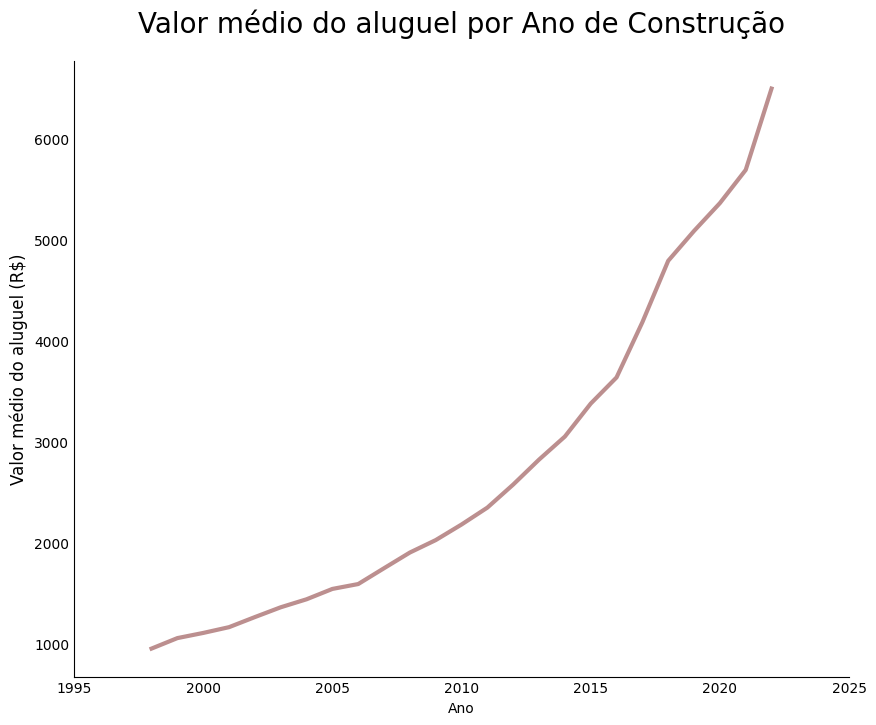

In [59]:
fig, ax = plt.subplots(figsize = (10,8))

ax = sns.lineplot( data = ano_aluguel, x = 'Ano', y = 'Valor', linewidth = 3, color = '#BC8F8F')
ax.set_xlim(1995, 2025)
ax.set_title('Valor médio do aluguel por Ano de Construção', fontsize = 20, pad = 20)
ax.set_ylabel('Valor médio do aluguel (R$)', fontsize=12)
ax.tick_params(axis='both', which='both', length=0)
sns.despine()

plt.show()

## 07-Analisando a distribuição dos tipos de dor cardíaca em pacientes

Agora, vamos explorar dados da área médica, com foco em informações relacionadas a doenças cardíacas. Nesta atividade, você analisará a distribuição dos tipos de dor torácica em um conjunto de dados de pacientes, criando um gráfico que visualize a frequência de cada categoria. Essa análise permitirá uma melhor compreensão dos padrões presentes nos dados.

Sua tarefa será:

* Carregar os [dados](https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/pacientes_doenca_cardiaca.csv);

* Contar quantos pacientes pertencem a cada categoria de dor torácica;

* Ordenar as categorias do maior para o menor valor;

* Criar um gráfico adequado para visualizar essa distribuição;

* Personalizar o gráfico para torná-lo mais informativo e fácil de interpretar.


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
url = 'https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/pacientes_doenca_cardiaca.csv'

In [64]:
df = pd.read_csv(url)
df.head()

,Idade,Sexo_biologico,Tipo_dor,Pressao_arterial,Colesterol,Glicemia_jejum>120,Resultados_ECG,Frequencia_cardiaca_max,Dor_exercicio,Depressao_ST,Inclinacao_ST,Numero_vasos_fluro,Teste_cintilografia,Doenca_cardiaca
0,70,Masculino,assintomática,130,322,Não,2,109,Não,2.4,2,3,3,Sim
1,67,Feminino,dor não anginosa,115,564,Não,2,160,Não,1.6,2,0,7,Não
2,57,Masculino,angina atípica,124,261,Não,0,141,Não,0.3,1,0,7,Sim
3,64,Masculino,assintomática,128,263,Não,0,105,Sim,0.2,2,1,7,Não
4,74,Feminino,angina atípica,120,269,Não,2,121,Sim,0.2,1,1,3,Não


In [68]:
tipo_dor = df.value_counts('Tipo_dor').reset_index()
tipo_dor = tipo_dor.rename(columns = {'count':'Quantidade de Pacientes'})
tipo_dor

,Tipo_dor,Quantidade de Pacientes
0,assintomática,129
1,dor não anginosa,79
2,angina atípica,42
3,angina típica,20


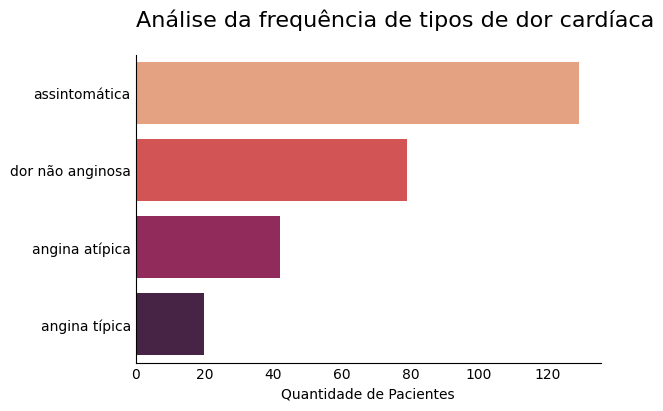

In [84]:
fig, ax = plt.subplots(figsize = (6,4))

ax = sns.barplot(data = tipo_dor, x = 'Quantidade de Pacientes', y = 'Tipo_dor', hue = 'Tipo_dor', palette = 'rocket_r')
ax.set_title('Análise da frequência de tipos de dor cardíaca', loc = 'left', fontsize = 16, pad = 20)
ax.set_ylabel('')
ax.tick_params(axis = 'both', which = 'both', length = 0)
sns.despine()


plt.show()

## 08-Analisando o faturamento global de jogos por gênero

O mercado de videogames é um dos mais lucrativos da indústria do entretenimento. Diferentes gêneros de jogos apresentam desempenhos variados em vendas globais, dependendo de fatores como popularidade, público-alvo e tendências do mercado.

Nesta atividade, você analisará o total de vendas globais para cada gênero de jogo, criando um gráfico que ilustre quais gêneros geraram mais receita.

Sua tarefa será:

* Carregar os [dados](https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dados_jogos.csv);

* Agrupar os valores de vendas globais por gênero;

* Ordenar os valores do maior para o menor;

* Criar um gráfico adequado para visualizar essa comparação;

* Personalizar o gráfico para torná-lo mais informativo e visualmente compreensível.

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dados_jogos.csv')
df.head()

,classificacao,nome,plataforma,ano,genero,desenvolvedor,vendas_america_norte,vendas_europa,vendas_japao,outras_vendas,vendas_globais
0,1,Wii Sports,Wii,2006.0,Esportes,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Esportes,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,RPG,Nintendo,11.27,8.89,10.22,1.00,31.37


In [92]:
vendas_genero = df.groupby('genero')['vendas_globais'].sum().reset_index().sort_values('vendas_globais', ascending = False)
vendas_genero

,genero,vendas_globais
1,Ação,1751.18
4,Esportes,1330.93
11,Tiro,1037.37
9,RPG,927.37
7,Plataforma,831.37
3,Diversos,809.96
2,Corrida,732.04
6,Luta,448.91
10,Simulação,392.20
8,Quebra-cabeça,244.95


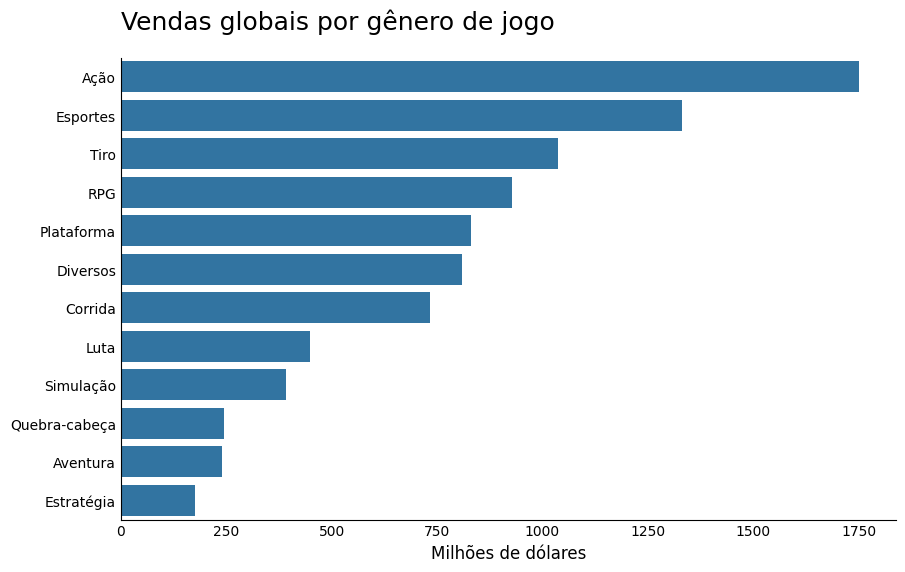

In [104]:
fig, ax = plt.subplots(figsize = (10,6))

ax = sns.barplot(data = vendas_genero, x = 'vendas_globais', y = 'genero')
ax.set_title('Vendas globais por gênero de jogo',loc = 'left', fontsize = 18, pad = 20)
ax.set_ylabel('')
ax.set_xlabel('Milhões de dólares', fontsize=12)
ax.tick_params(axis='both', which='both', length=0)
sns.despine()


plt.show()

## 09-Analisando o faturamento de jogos por gênero no Japão

Os mercados de videogames ao redor do mundo podem apresentar diferenças significativas em termos de preferências por determinados gêneros.

Nesta atividade, vamos analisar as vendas por gênero focando exclusivamente no Japão. E aí, será que o resultado será muito diferente daquele que tivemos na análise global? Vamos descobrir!

Sua tarefa será:

* Carregar os [dados](https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dados_jogos.csv);

* Agrupar os valores de vendas globais por gênero;

* Ordenar os valores do maior para o menor;

* Criar um gráfico adequado para visualizar essa comparação;

* Personalizar o gráfico para torná-lo mais informativo e visualmente compreensível.

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dados_jogos.csv')
df.head()

,classificacao,nome,plataforma,ano,genero,desenvolvedor,vendas_america_norte,vendas_europa,vendas_japao,outras_vendas,vendas_globais
0,1,Wii Sports,Wii,2006.0,Esportes,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Plataforma,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Corrida,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Esportes,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,RPG,Nintendo,11.27,8.89,10.22,1.00,31.37


In [110]:
vendas_japao = df.groupby('genero')['vendas_japao'].sum().reset_index().sort_values('vendas_japao', ascending = False)
vendas_japao

,genero,vendas_japao
9,RPG,352.31
1,Ação,159.95
4,Esportes,135.37
7,Plataforma,130.77
3,Diversos,107.76
6,Luta,87.35
10,Simulação,63.70
8,Quebra-cabeça,57.31
2,Corrida,56.69
0,Aventura,52.07


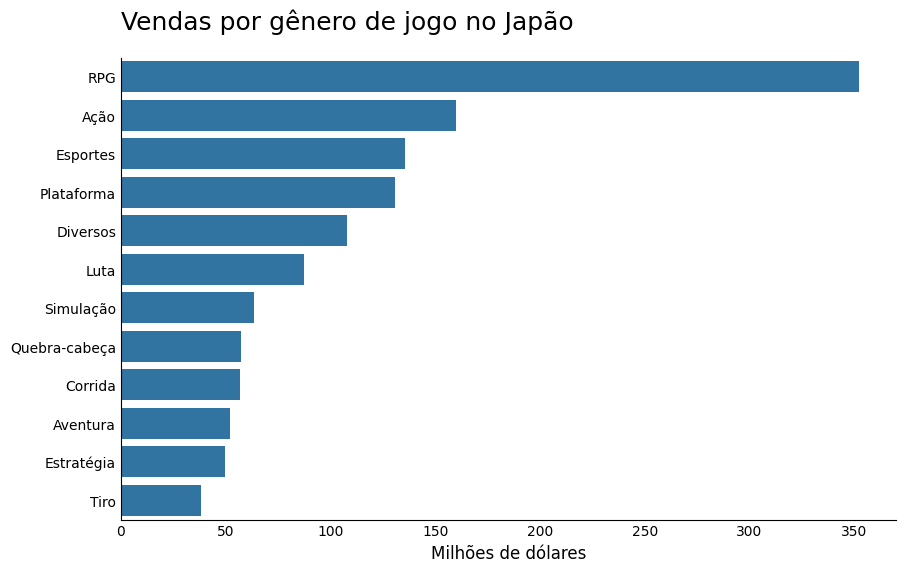

In [112]:
fig, ax = plt.subplots(figsize = (10,6))

ax = sns.barplot(data = vendas_japao, x = 'vendas_japao', y = 'genero')
ax.set_title('Vendas por gênero de jogo no Japão',loc = 'left', fontsize = 18, pad = 20)
ax.set_ylabel('')
ax.set_xlabel('Milhões de dólares', fontsize=12)
ax.tick_params(axis='both', which='both', length=0)
sns.despine()


plt.show()

## 10-Comparando vendas globais por categoria e região em um e-commerce

Agora vamos analisar os dados de um e-commerce internacional, que vende diversos produtos para consumidores ao redor do mundo. Algumas categorias de produtos vendidos por esse e-commerce podem ter um desempenho muito melhor em um mercado do que em outro. Para otimizar as estratégias de vendas e marketing, eles precisam comparar as vendas (em milhões de dólares) de diferentes tipos de produtos em cada uma dessas regiões.

Sua tarefa será:

* Carregar os [dados](https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dataset_vendas.csv);

* Criar um gráfico adequado para visualizar essa comparação;

* Personalizar o gráfico para torná-lo mais informativo e visualmente compreensível.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [113]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/python_dados/refs/heads/main/Dados/dataset_vendas.csv')
df.head()

,Categoria,Regiao,Vendas
0,Eletrônicos,América do Norte,120
1,Eletrônicos,Europa,100
2,Eletrônicos,Ásia,130
3,Móveis,América do Norte,80
4,Móveis,Europa,90


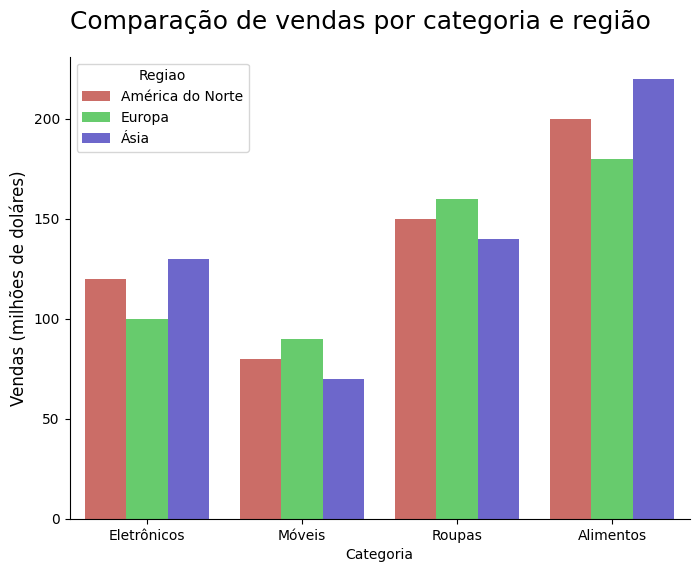

In [128]:
fig, ax = plt.subplots(figsize = (8,6))

ax = sns.barplot(data = df, x = 'Categoria', y = 'Vendas', hue = 'Regiao',palette = 'hls' )
ax.set_title('Comparação de vendas por categoria e região', loc='left', fontsize = 18, pad = 20)
ax.set_ylabel('Vendas (milhões de doláres)', fontsize=12)
sns.despine()

plt.show()